Part 1: Answer the questions in written form. Provide 2-3 sentences for each question, bring
examples when needed. Collect your answers in a PDF file. (20 points)


1. In a dataset with a non-normal distribution and potential extreme values, how are the
whiskers in a boxplot determined, and what are the limitations of the standard IQR based rule in such cases?

The standard way of determining the boxplot whiskers is Using the formula $Q_1 - 1.5 \cdot IQR$ for lower whisker (or on the left), and $Q_3 + 1.5 \cdot IQR$ for the upper (or on the right) whisker. There are some modifications that would help us get a better fitted boxplot for the distribution, including changing the hyperparameter (1.5) to something bigger or smaller, or including the density for better representation.

2. Given a dataset with heavy skewness and multiple peaks, how can a boxplot
misrepresent outliers, and what alternative methods exist for identifying them more
accurately?

If we have the 2 modes from the dataset that are on the edges of the distribution, then many representatives from that distribution are going to be considered as outliers according to the boxplot. Use density plot instead to be sure that we are not considering those as outliers

3. Explain the conceptual difference between median and mean in the context of non-symmetric distributions. Why does a boxplot prioritize the median, and in what cases
could this choice obscure important data characteristics?

Boxplot is used to determine what range the data lies in, where do we get the 50% of the data around the central one. Mean on the other hand, finds what we would get if we divide the total value by the count. meaning, that if there is a huge outlier, it is going to distort the mean, but the boxplot is going to understand that it is in fact an outlier. However in case of patters, or outliers being denser than usual, the boxplot may mislead to wrong conclusions.

4. If a boxplot exhibits strong right skewness, what can you infer about the underlying
probability distribution? How would this skewness affect statistical measures such as
variance, skewness coefficient, and potential model assumptions?

We can conclude that the majority of data is concentrated on the left part of the distribution, hence the median is situated more left than the mean, skewness coefficient is positive, variance is more or less the same as that of the boxplot, and potentially have a normality model tests to check how normal is the data distribution

5. Why are boxplots particularly useful for comparing multiple groups in high-dimensional
data? What are the limitations of boxplots when dealing with overlapping distributions
or categorical variables with small sample sizes?

We can see the distribution difference between 2 categorical variables and have an idea if there are any patterns, or outliers in the dataset. When dealing with equivalently distributed data, the data becomes redundant, and hard to track.

6. What are the theoretical consequences of selecting an inappropriate number of bins in a
histogram, particularly in datasets with varying density regions or multimodal
distributions? How does bin width selection affect kernel density estimation (KDE)?

The wrong selection of bin number will result in either overfitting or underfitting the data. We want to be sure that the ar plot depicts the data well by summarizing the key points and not resulting in a picture close to density plot. By that, we can see either something exactly like the KDE, or something completely non-corresponding to it

7. Histograms and bar charts both use rectangular bars to display data. How does the
interpretation of frequency differ in these two visualizations, and why is bin choice
irrelevant in bar charts but crucial in histograms?

Histograms map the data on a non-categorical continuous metric, whereas bar plots do so on categorical data. This means, that the bin number is predefined for bar plots, but for histograms, it will change the depicted data according to the answer inn 6.

8. Under what conditions might a histogram distort the perception of a dataset’s
distribution? Provide an example where binning choices lead to misleading conclusions,
and explain how alternative visualizations (e.g., KDE or violin plots) could address these
distortions.

In some cases, there is an inappropriate number of bins (underfitting the data), uneven bin widths (hard to read visualisations) and/or mapping on a small data sample (not accurate, not enough for forming a distribution). Compared to e.g. the density plots or even boxplots of the given data, mistakes on the listed fronts will result in complete distortion from the original data.

9. How does a density plot differ from a histogram in terms of its mathematical foundation
and interpretability? What challenges arise when choosing a kernel function and
bandwidth for density estimation, particularly in sparse datasets?

In some way, KDE is what we get if we tend the bin number in a histogram to infinity. The difference is how discrete the histogram is and how continuous the KDE is. Meaning, that if there is enough data, we will get more precise (not more or less usmmarized data in comparison to histograms). A small bandwidth may lead to high variance and overfitting while a big bandwith may result in the opposite. Sparse data makes it harder to balance bias and variance, and selecting the right kernel is difficult due to limited data and potential outliers.

10. Explain why the area under a density plot is always equal to 1. How does this property
relate to probability theory, and what implications does it have for comparing
distributions with different sample sizes?

When dealing with Probability density functions, we know that the area below should be equal to 1 as it represents the total probability which is always 1. If we assume that the probability of all possible outcomes is less or more than 1, we will destroy all of the probability theory. Different sample sizes will have the same shape (the are is always 1), however the scale may differ (it usually does).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
cancer_data = pd.read_csv('lung_cancer_prediction_dataset.csv')
pollution_data = pd.read_csv('global_air_pollution_dataset.csv')
pollution_data

,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


{'whiskers': [<matplotlib.lines.Line2D at 0x10d57aad0>,
 'caps': [<matplotlib.lines.Line2D at 0x10d5c9450>,
 'boxes': [<matplotlib.lines.Line2D at 0x10d579090>],
 'medians': [<matplotlib.lines.Line2D at 0x10d5c96d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10d5c9810>],
 'means': []}

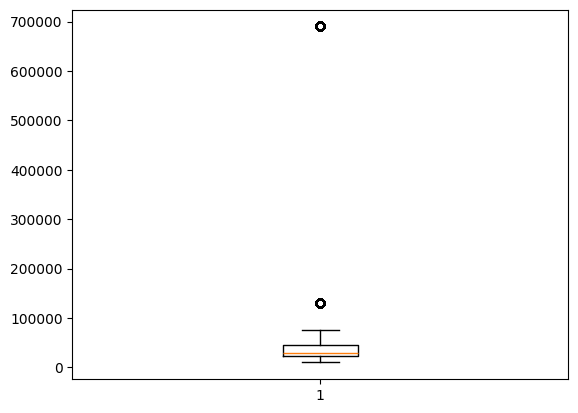

In [21]:
plt.boxplot(cancer_data['Annual_Lung_Cancer_Deaths'])

(array([9725., 9558., 1624., 2127.,  183.,   74.,   41.,   33.,   29.,
          69.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

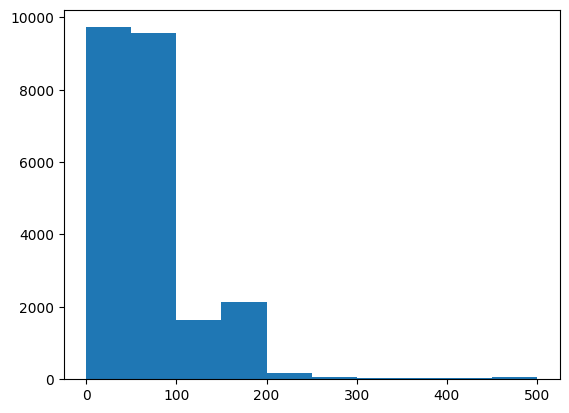

In [28]:
plt.hist(pollution_data['PM2.5_AQI_Value'])

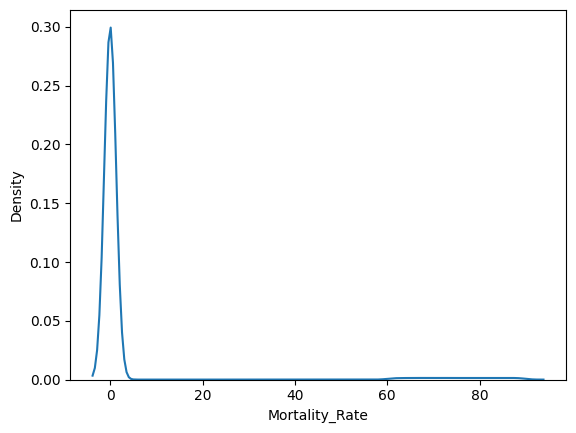

In [34]:
sns.kdeplot(cancer_data['Mortality_Rate'])
plt.show()

Part 4: Recreate the following graphs
1.

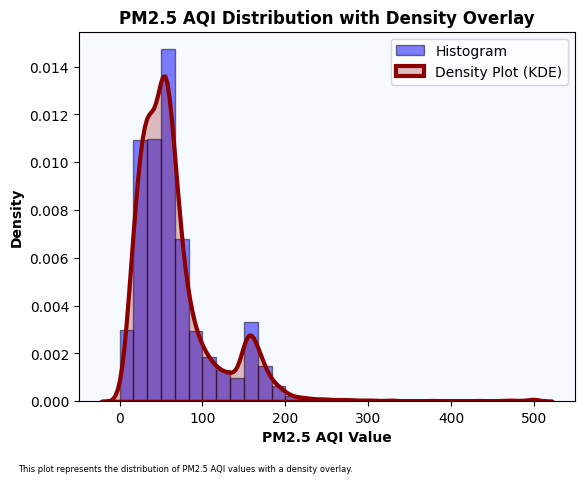

In [52]:
plt.rc("axes", axisbelow=True)
plt.figure(facecolor="white")
plt.gca().set_facecolor("#e4f6f8")
plt.hist(data=pollution_data, x = "PM2.5_AQI_Value", bins=30, edgecolor="black", color="blue", alpha=0.5, label="Histogram", density=True)
sns.kdeplot(data=pollution_data, x="PM2.5_AQI_Value", color="darkred", fill=True, linewidth = 3, label="Density Plot (KDE)")
plt.xlabel("PM2.5 AQI Value", weight = "bold")
plt.ylabel("Density", weight="bold")
plt.title("PM2.5 AQI Distribution with Density Overlay", weight='bold')
plt.legend(["Histogram", "Density Plot (KDE)"])
plt.text(80, -0.003, "This plot represents the distribution of PM2.5 AQI values with a density overlay.", wrap=False, verticalalignment="bottom", horizontalalignment="center", fontsize=6)
plt.show();